### Object Oriented K-Nearest Neighbors Implementation

Contained in this repo are:

  1. An implementation of K-Nearest Neighbors classification algorithm using an object oriented approach in the style of **SKlearn** . View the code [here](https://github.com/joelcarlson/ipython-notebooks/blob/master/KNearestNeighbors_Implementation/KNN/KNN.py)
    
  2. An ad-hoc implementation of a k-fold cross validation function to test the KNN algorithm. View the code [here](https://github.com/joelcarlson/ipython-notebooks/blob/master/KNearestNeighbors_Implementation/KNN/cv_score.py)

The algorithm is unique in that the training phase of the algorithm is simply saving the dataset - that is, there is essentially no training time. Of course, this means that all the calculation is done when predictions on new data are being made.

Making predictions is completed as follows:

For new data point *X*:
    1. Calculate the distance between X and every point in the training data
    2. Sort the distances in increasing order
    3. Take the K items with the smallest distance to X
    4. Predict that X is the majority class among these K items (neighbors)
    
It is clear that this algorithm does not scale well, as each new prediction is very costly. Furthermore, KNN is highly susceptible to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). It is, however, a simple first step for clustering data.

### Usage

In [198]:
# Import the code!
from KNN import KNN
from KNN import cv_score

from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split, cross_val_score
import numpy as np

In [3]:
# Create synthetic dataset
X, y = make_classification(n_features=4, n_redundant=0, n_informative=2, n_classes=2,
                           n_clusters_per_class=1, class_sep=5, random_state=5)

# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


With the data created, we can go ahead and initialize and train the model:

In [4]:
k = 10
model = KNN.KNearestNeighbors(k, KNN.euclidean_dist)
model.fit(X_train, y_train)

With the model trained, we can then predict new data:

In [10]:
preds = model.predict(X_test)
# Check accuracy:
round(100*sum(preds == y_test)/float(len(y_test)), 3)

96.667

### Visualizing the Influence of K

Perhaps that dataset was a little too easy. We can use a more complicated dataset, and visualize the accuracy as we vary K:

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create more difficult dataset
X, y = make_classification(n_features=4, n_redundant=0, n_informative=2, n_classes=2,
                           n_clusters_per_class=1, class_sep=0.2, random_state=5)

# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

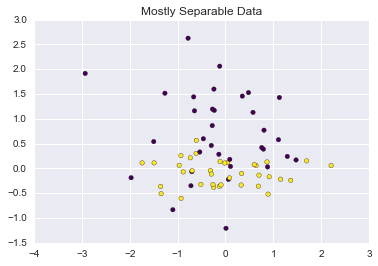

In [44]:
plt.scatter(x=X_train[:,0], y=X_train[:,2], c=y_train, cmap="viridis")
plt.title("Mostly Separable Data");

In [177]:
means_lst = []
se_lst = []
for k in range(1,25):
    model = KNN.KNearestNeighbors(k, KNN.euclidean_dist)
    scores = cv_score(model, X, y, n_folds=10, random_state=100)
    means_lst.append(np.mean(scores))
    se_lst.append(np.std(scores)/(len(scores)**0.5))

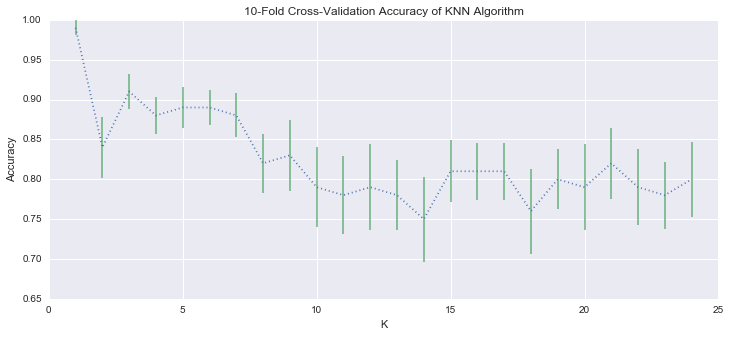

In [188]:
plt.figure(figsize=(12,5))
plt.plot(range(1,25), means_lst, ls='dotted')
plt.errorbar(range(1,25), means_lst, yerr=se_lst, ls='none', alpha=0.75)
plt.title("10-Fold Cross-Validation Accuracy of KNN Algorithm")
plt.ylabel("Accuracy")
plt.xlabel("K");